# Tarea 4: Por Hugo Alejandro Hinojosa Novales

## Implemenar una red neuronal utilizando Keras

En esta tarea vas a desarrollar una red neuronal utilizando el conjunto de datos Iris.

En la clase 6 revisamos brevemente este dataset, si aún no tienes claro qué variables son dependientes e independientes puedes revisar la documentación del [dataset](https://archive.ics.uci.edu/ml/datasets/iris).

La finalidad de esta tarea no es que encuentres el mejor modelo (aunque sería bueno que experimentes y encuentres uno bueno) si no que te familiarices con el uso de [Keras](https://keras.io/) y aprendas a utilizar su documentación.

En cada ejercicio agrega las celdas que necesites.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

## I. Preparación de los datos

### Ejercicio 1:

1.1 Carga el [conjunto de datos Iris desde sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

1.2 Guarda los rasgos del conjunto de datos en la variable X

1.3 Guarda la salida del conjunto de datos en la variable y

Nota: Asegurate de tener instalada la libreria de sklearn

In [ ]:
from sklearn import datasets

datos = sk.datasets.load_iris()
datos_x = datos.data
datos_y = datos.target

In [ ]:
datos_x.shape

(150, 4)

In [ ]:
datos_y.shape

(150,)

### Ejercicio 2

2.1 Verifica que el tipo de dato de X y y es un arreglo

2.2 Convierte los arreglos a dataframes de pandas y concatenalos para tener un dataframe como el siguiente:

| sepal_length | sepal_width | petal_length | petal_width | target |
| --- | --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 | 0 |
| 4.9 | 3.0 | 1.4 | 0.2 | 0 |

Hint:

Si no sabes cómo convertir un arreglo en dataframe puedes buscar en google algo así: *how to convert numpy array to dataframe pandas*

Puedes generar un dataframe para las X y uno para las y y despues *juntarlos*. Si no sabes cómo hacer esto, puedes buscar una [cheat sheet de pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). (En particular puedes utilizar merge sobre el indice de los dataframes creados).

In [ ]:
#Veamos que sí es un arreglo

print("El tipo de datos_x es ", type(datos_x))
print("El tipo de datos_y es ", type(datos_y))

#Para transformarlo en datagrame se hace lo siguiente

df = pd.DataFrame(datos_x, columns = ["sepal_length", "sepal_width", "petal_lenght", "petal_width"])
df_2 = pd.DataFrame(datos_y, columns = ["target"])

El tipo de datos_x es  <class 'numpy.ndarray'>
El tipo de datos_y es  <class 'numpy.ndarray'>


In [ ]:
df

,sepal_length,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df_2

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
#Y los unimos

df_def = pd.concat([df, df_2], axis = 1)

In [ ]:
df_def

,sepal_length,sepal_width,petal_lenght,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Ejercicio 3

3.1 Los datos estan ordenados de alguna manera?, si es así reordenalos de manera aleatoria.

3.2 Utiliza el método describe para generar una tabla con información estadística

In [ ]:
#Sí, los datos se ven bastante ordenados, es tiempo de reordenarlos

df_def2 = df_def.sample(frac=1)

In [ ]:
df_def2

,sepal_length,sepal_width,petal_lenght,petal_width,target
58,6.6,2.9,4.6,1.3,1
102,7.1,3.0,5.9,2.1,2
133,6.3,2.8,5.1,1.5,2
8,4.4,2.9,1.4,0.2,0
38,4.4,3.0,1.3,0.2,0
...,...,...,...,...,...
54,6.5,2.8,4.6,1.5,1
49,5.0,3.3,1.4,0.2,0
22,4.6,3.6,1.0,0.2,0
91,6.1,3.0,4.6,1.4,1


In [ ]:
#Y generamos nuestra tabla de datos estadísticos

df_def2.describe()

,sepal_length,sepal_width,petal_lenght,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Ejercicio 4

Realiza los histogramas de cada variable en el dataframe

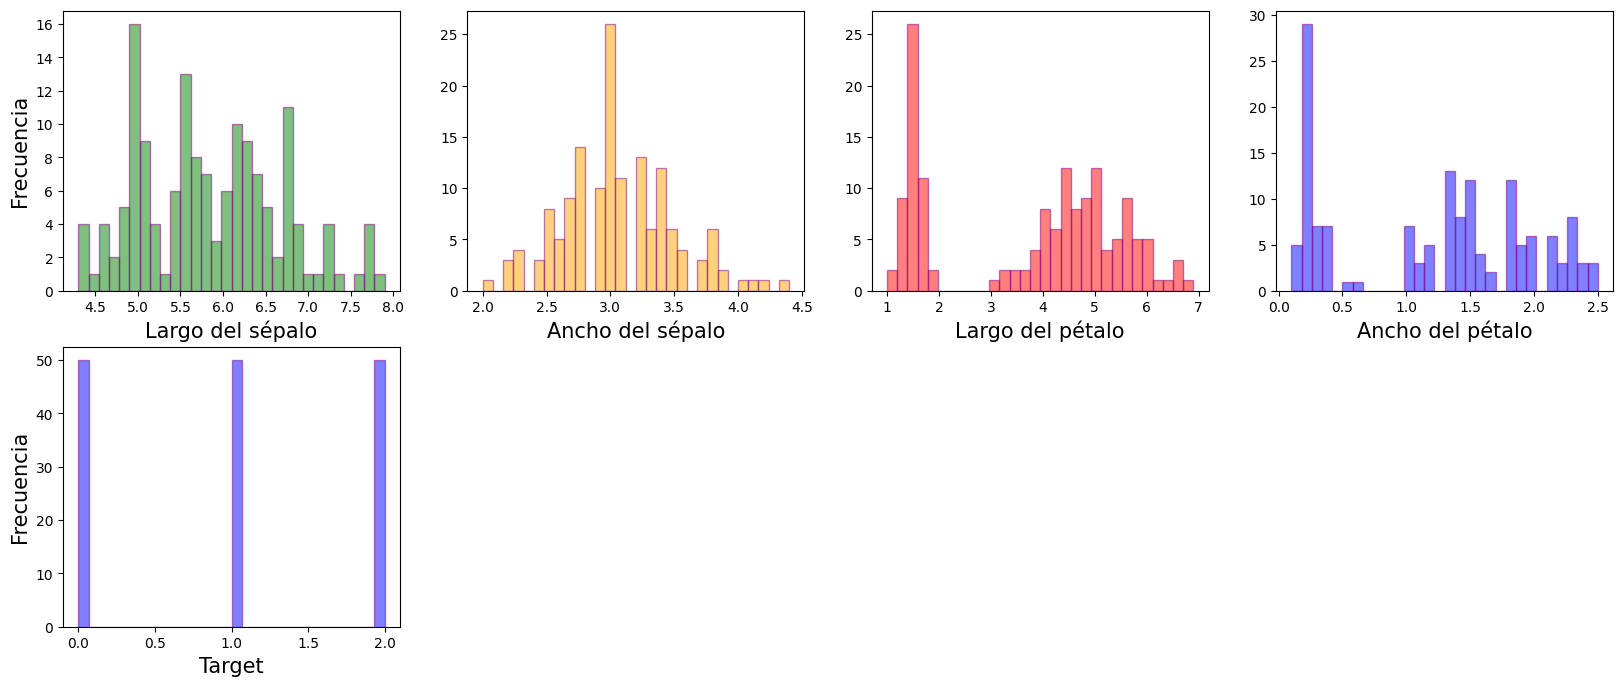

In [ ]:
#Vamos a hacer los histogramas

plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,4,5)

ax1.hist(df_def2.sepal_length, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Largo del sépalo', size=15)
ax1.set_ylabel('Frecuencia', size=15)

ax2.hist(df_def2.sepal_width, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Ancho del sépalo', size=15)

ax3.hist(df_def2.petal_lenght, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Largo del pétalo', size=15)

ax4.hist(df_def2.petal_width, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Ancho del pétalo', size=15);

ax5.hist(df_def2.target, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax5.set_xlabel('Target', size=15)
ax5.set_ylabel('Frecuencia', size=15);

### Ejercicio 5

5.1 Separa el conjunto de datos en los conjuntos de entrenamiento (90%) y de prueba (10%). Muestra cuántas muestras tiene cada conjunto

5.2 Separa las variables independientes de las variables dependientes para el conjunto de prueba y el conjunto de entrenamiento. Revisa las dimensiones de cada conjunto

5.3 Normaliza los datos de entrenamiento y prueba (solo normaliza a las variables independientes)


In [ ]:
#Para separar el conjunto, se debe definir un ratio, en este caso será del 0.1 que simboliza el 10%

test_ratio = 0.1

tr = int((1.0-test_ratio)*len(df_def2.values[:,:]))

df_tr = df_def2.iloc[0:tr,:]
df_tst  = df_def2.iloc[tr:,:]

#Justo lo que definimos en tr, es que nos dijera hasta qué muestra se hace el 90%, en esencia
#se multiplica 0.9*(el numero de filas), obteniendo así la división deseada

In [ ]:
#Para verlo mejor, me sirvió ver esto

len(df_def2.values[:,:])

150

In [ ]:
#Veamos si se cumplió con éxito

print(df_tr.shape)
print(df_tst.shape)

(135, 5)
(15, 5)


In [ ]:
#Ahora, vamos a dividir las variables

tr_x = df_tr.values[:,:-1]
tr_y = df_tr.values[:,-1:]

print(tr_x.shape)
print(tr_y.shape)

(135, 4)
(135, 1)


In [ ]:
tst_x = df_tst.values[:,:-1]
tst_y = df_tst.values[:,-1:]

print(tst_x.shape)
print(tst_y.shape)

(15, 4)
(15, 1)


In [ ]:
#Finalmente, los normalizamos

mntr = tr_x.mean()
stdtr = tr_x.std()

tr_x_norm = (tr_x - mntr)/stdtr
tr_x_norm

array([[ 1.597799  , -0.28085833,  0.58230855, -1.09325069],
       [ 1.85167162, -0.23008381,  1.24237735, -0.68705451],
       [ 1.44547544, -0.33163285,  0.83618117, -0.99170165],
       [ 0.48075951, -0.28085833, -1.04247617, -1.65177044],
       [ 0.48075951, -0.23008381, -1.09325069, -1.65177044],
       [ 0.83618117,  0.17611237, -0.78860356, -1.5502214 ],
       [ 1.34392639, -0.28085833,  0.63308307, -1.04247617],
       [ 1.49624996, -0.12853476,  0.53153403, -0.99170165],
       [ 1.24237735, -0.12853476,  0.6838576 , -0.83937808],
       [ 1.19160282, -0.4331819 ,  0.27766142, -1.14402521],
       [ 0.78540664, -0.02698572, -0.99170165, -1.65177044],
       [ 0.98850473,  0.12533785, -0.99170165, -1.65177044],
       [ 1.39470091, -0.33163285,  0.6838576 , -0.83937808],
       [ 1.09005378, -0.23008381,  0.53153403, -0.99170165],
       [ 1.75012257, -0.17930929,  0.73463212, -0.99170165],
       [ 1.24237735, -0.23008381,  0.37921046, -0.99170165],
       [ 0.63308307, -0.

In [ ]:
mntst = tst_x.mean()
stdtst = tst_x.std()

tst_x_norm = (tst_x - mntst)/stdtst
tst_x_norm

array([[ 0.71320807,  0.01658623, -1.07810522, -1.67520965],
       [ 1.55910601, -0.28196598,  0.71320807, -0.92882911],
       [ 1.55910601, -0.23220728,  0.56393196, -1.02834652],
       [ 2.05669304,  0.11610364,  1.55910601, -0.6800356 ],
       [ 0.76296677, -0.03317247, -1.07810522, -1.62545095],
       [ 1.4098299 , -0.18244858,  0.86248418, -0.6302769 ],
       [ 0.76296677, -0.03317247, -1.07810522, -1.67520965],
       [ 1.06151899, -0.38148339,  0.46441456, -1.12786392],
       [ 1.3600712 , -0.33172468,  1.01176028, -0.87907041],
       [ 1.16103639, -0.28196598,  0.76296677, -0.87907041],
       [ 1.45958861, -0.38148339,  0.51417326, -1.02834652],
       [ 0.71320807, -0.13268987, -1.07810522, -1.67520965],
       [ 0.51417326,  0.01658623, -1.27714003, -1.67520965],
       [ 1.2605538 , -0.28196598,  0.51417326, -1.07810522],
       [ 1.45958861, -0.18244858,  0.76296677, -0.77955301]])

## II. Implementación de la red neuronal

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
np.random.seed(1)

### Ejercicio 7

Implementa una red neuronal con dos capas ocultas. Completa la función **architecture** que define la arquitectura.

Cúantos nodos debe tener la capa de entrada?

Cuántos valores posibles puede tomar la variable **target**? Esto define el número de clases que tienes, y por lo tanto, el número de nodos en la capa de salida

En este caso vamos a realizar una clasificación (veremos a detalle esto en las siguientes clases) porque tenemos un target categorico, por lo que la última capa debe tener tantos nodos como salidas o clases.

Nota: si crees que el modelo funciona mejor con más o menos capas, modifica la función para agregar las capas que desees.

In [ ]:
def architecture(n_hidden1, n_hidden2, initializer, activation, input_shape, classes):

    model = Sequential()

    model.add(Dense(units=n_hidden1,                 #units da el número de nodos
                    kernel_initializer=initializer, # Initiallizacion de los pesos W
                    bias_initializer='zeros',       # Inicialización del bias
                    activation=activation,          # Función de activación
                    input_shape=input_shape,))       # Da el numero de nodos de la capa de entrada.
                                                    # Este número corresponde al número de rasgos X que definen
                                                    # al sistema de estudio

    model.add(Dense(units=n_hidden2,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation=activation,))

    model.add(Dense(units=classes,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation = 'softmax'))

    return model

capa1 = 10
capa2 = 5
init = 'uniform'
act = 'tanh'
input = (4,)
clas = 3

### Ejercicio 8

8.1 Llama a la función architecture para definir el modelo que vas a entrenar

8.2 Utiliza el metodo plot_model para visualizar un diagrama del modelo que definiste

8.3 Cuántos parametros (w y b) tiene el modelo que definiste (puedes calcularlo a mano o utilizar el método summary)

In [ ]:
#Llamamos a la funcion para crear nuestro modelo

iris_model = architecture(capa1, capa2, init, act, input, clas)

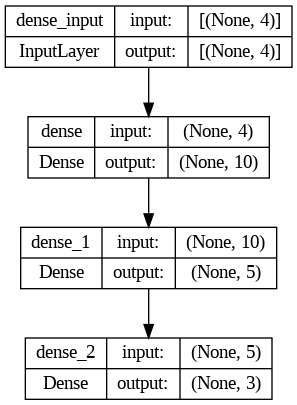

In [ ]:
#Llamamos plot_model para ver el modelo

plot_model(iris_model, to_file='iris_model.png', show_shapes=True, show_layer_names=True)

### Ejercicio 9

9.1 Compila el modelo que definiste utilizando la función de costo y [métrica](https://keras.io/api/metrics/probabilistic_metrics/) [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/)

Para el optimizador puedes probar algunos de los que se indican [aquí](https://keras.io/api/optimizers/), quedate con el que te dé mejor resultados.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
loss = 'sparse_categorical_crossentropy'
acc = 'accuracy'

In [ ]:
#Y no olvidemos de compilar el modelo

iris_model.compile(optimizer = optimizer, loss = loss, metrics = acc)

### Ejercicio 10

9.1 Entrena el modelo utilizando el método fit()

9.2 Grafica el costo de entrenamiento y de validación con respecto a la época.

9.2 Grafica el accuracy de entrenamiento y de validación con respecto a la época.

Hint: revisa la salida del entrenamiento *history_model.history*

In [ ]:
num_epochs = 100

history_model = iris_model.fit(x = tr_x_norm, y = tr_y, epochs=num_epochs, batch_size = 32, \
                          validation_data=(tst_x_norm,tst_y), shuffle=False, verbose=2)

Epoch 1/100
5/5 - 2s - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333 - 2s/epoch - 330ms/step
Epoch 2/100
5/5 - 0s - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0985 - val_accuracy: 0.3333 - 72ms/epoch - 14ms/step
Epoch 3/100
5/5 - 0s - loss: 1.0985 - accuracy: 0.3778 - val_loss: 1.0985 - val_accuracy: 0.3333 - 63ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 1.0985 - accuracy: 0.3259 - val_loss: 1.0985 - val_accuracy: 0.3333 - 46ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0985 - val_accuracy: 0.3333 - 59ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0985 - val_accuracy: 0.3333 - 88ms/epoch - 18ms/step
Epoch 7/100
5/5 - 0s - loss: 1.0984 - accuracy: 0.3333 - val_loss: 1.0985 - val_accuracy: 0.3333 - 52ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 1.0984 - accuracy: 0.3333 - val_loss: 1.0984 - val_accuracy: 0.3333 - 44ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss

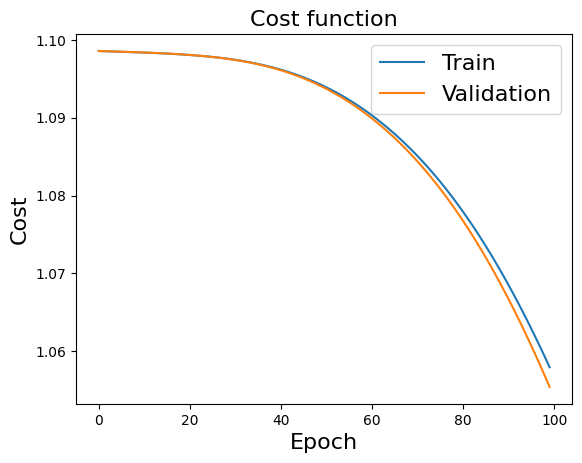

In [ ]:
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 16})
plt.show()

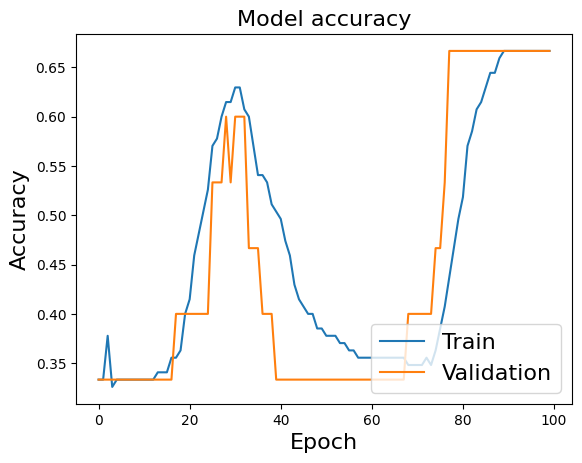

In [ ]:
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model accuracy', size=16)
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 16})
plt.show()

### Ejercicio 11

Evalúa tu modelo utilizando los datos de prueba y el método evaluate()

In [ ]:
#Finalizamos con evaluate

evaluations = iris_model.evaluate(x = tst_x_norm, y = tst_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))

1/1 [==============================] - 0s 18ms/step - loss: 1.0554 - accuracy: 0.6667
Loss = 1.0554076433181763
Test Accuracy = 0.6666666865348816
